In [4]:
# Binary Classification with a Bank Churn Dataset

In [5]:
# https://www.kaggle.com/datasets/aarushikamboj/binary-classification-with-a-bank-churn-dataset/data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree, export_text
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from sklearn.preprocessing import LabelEncoder


In [3]:
churn=pd.read_csv('E:/python/decision_tree/bank_customer_churn_prediction_dataset/train.csv')
churn.shape

(165034, 14)

In [4]:
churn.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
churn.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [7]:
churn.drop('id',axis=1,inplace=True)
churn.drop('Surname',axis=1,inplace=True)

In [8]:
# churn.drop('CustomerId',axis=1,inplace=True)

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  object 
 3   Gender           165034 non-null  object 
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 15.1+ MB


In [10]:
churn.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
# sns.pairplot(data=churn,hue='Exited')

In [16]:
# ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
#        'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']

In [11]:
X=churn[['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary','Exited']]
y=churn['Exited']

In [34]:
# X=churn[['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
#        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
#        'EstimatedSalary']]
# y=churn['Exited']

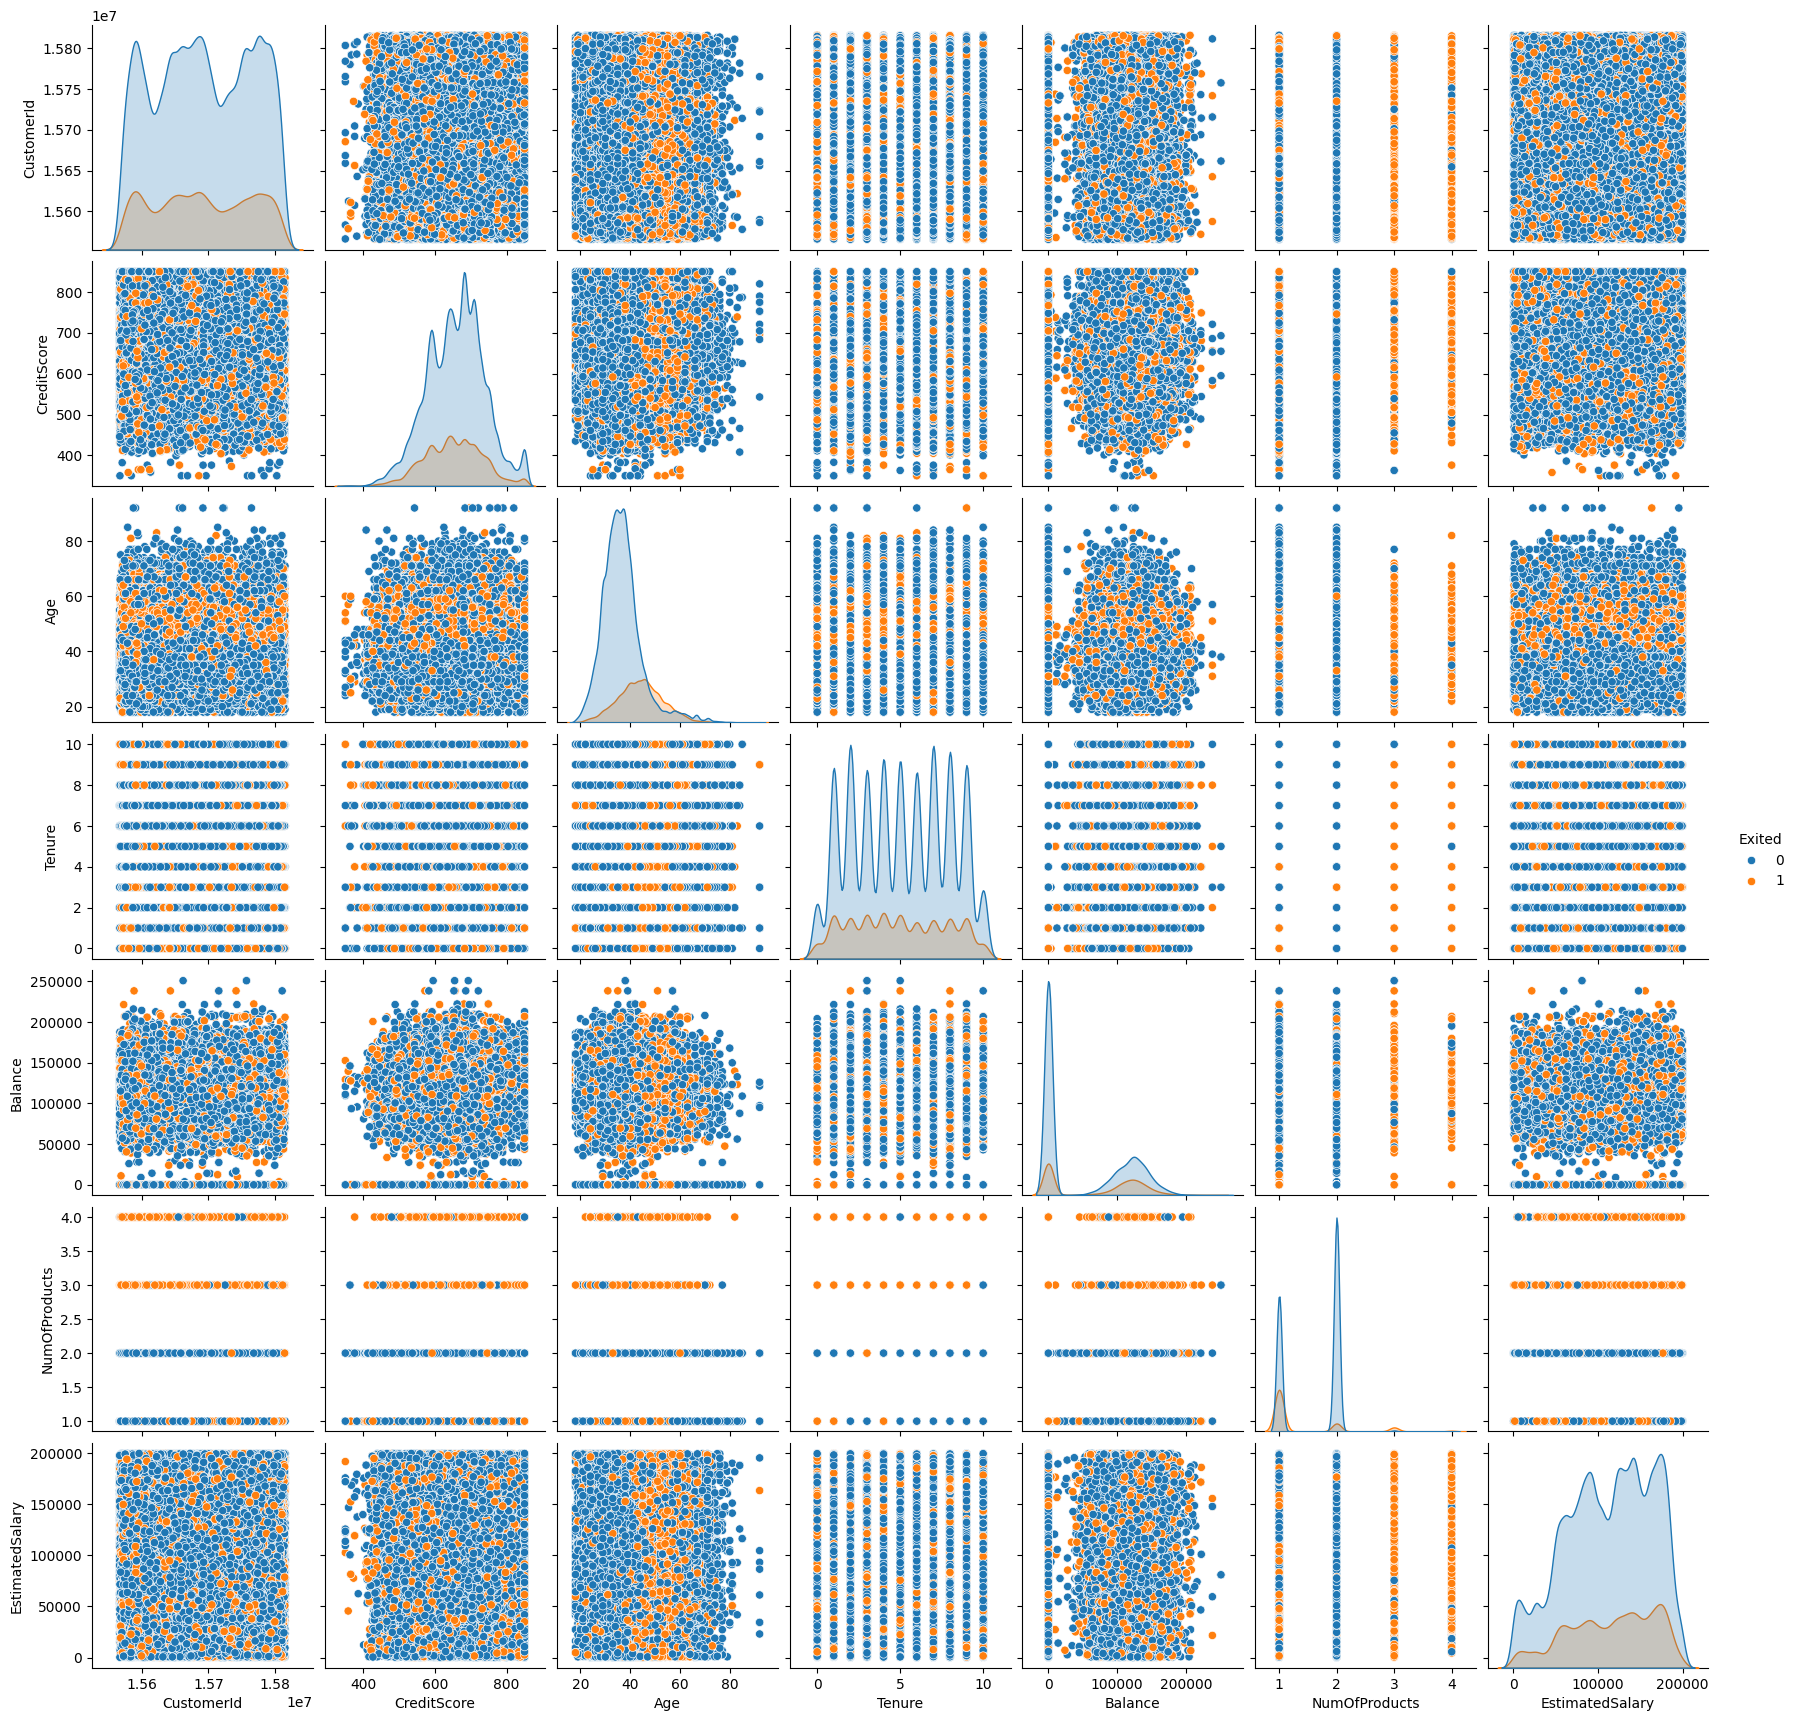

In [32]:
sns.pairplot(data=X,hue='Exited')

In [60]:
X=churn[['Age', 'Balance', 'NumOfProducts']]
y=churn['Exited']

In [61]:
columns=[i for i in X if X[i].dtype==object]
encoding=LabelEncoder()
for i in columns:
    X[i]=encoding.fit_transform(X[i])

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Age            165034 non-null  float64
 1   Balance        165034 non-null  float64
 2   NumOfProducts  165034 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.8 MB


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((123775, 3), (41259, 3), (123775,), (41259,))

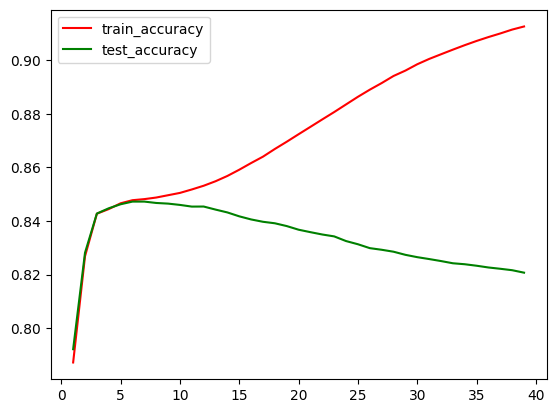

In [64]:
train_accuracy=[]
test_accuracy=[]
for d  in range(1,40):
    model=DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

plt.plot(range(1,40),train_accuracy,c='red',label='train_accuracy')
plt.plot(range(1,40),test_accuracy,c='green',label='test_accuracy')
plt.legend()
plt.show()

In [81]:


model=DecisionTreeClassifier(criterion='entropy',max_depth=7)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
model.score(X_test,y_test)


0.8472333309096197

In [82]:
model.get_depth()

7

In [83]:
accuracy_score(y_test,y_predict)

0.8472333309096197

In [84]:
model.feature_importances_

array([0.47797046, 0.07246513, 0.44956441])

In [85]:
X.columns[model.feature_importances_>0.05]

Index(['Age', 'Balance', 'NumOfProducts'], dtype='object')

In [86]:

# plt.figure(figsize=[8,10])
# plot_tree(model,feature_names=X.columns,class_names=model.classes_,rounded=True,filled=True)
# plt.show()

In [87]:
X.columns[model.feature_importances_>0]

Index(['Age', 'Balance', 'NumOfProducts'], dtype='object')

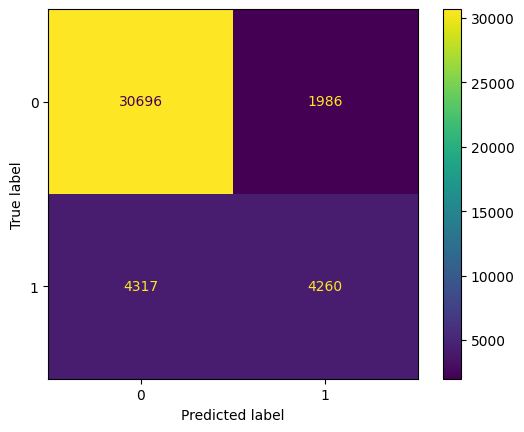

In [88]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [49]:
# issue in ploting tree